In [1]:
import matplotlib.gridspec as grid_spec
import matplotlib.pyplot as plt
import numpy as np

import torch

plt.style.use('seaborn-whitegrid')

In [2]:
ls

argparse-test.py   experiments/      __pycache__/    skip.py
cnn-experiment.py  final_script.sh*  results.txt     summary.py
data/              modelconfigs.txt  script.sh*      visualizer.ipynb
epoch_1/           new-script.sh*    sequential.npy
epoch_10/          presentation.txt  skip_conv.txt


In [2]:
n_conv = np.load('epoch_1/n-conv.npy')
u_conv = np.load('epoch_1/u-conv.npy')
xn_conv = np.load('epoch_1/xn-conv.npy')
xu_conv = np.load('epoch_1/xu-conv.npy')
ku_in_conv = np.load('epoch_1/ku-in-conv.npy')
ku_out_conv = np.load('epoch_1/ku-out-conv.npy')

xn_conv_10 = np.load('epoch_10/xn-conv.npy')
u_conv_10 = np.load('epoch_10/u-conv.npy')
xn_conv_10 = xn_conv_10.reshape(-1)
u_conv_10 = u_conv_10.reshape(-1)
u_conv = u_conv[0]

In [8]:
u_conv[u_conv > 2.3] = 2.3
u_conv_10[u_conv_10 > 2.3] = 2.3

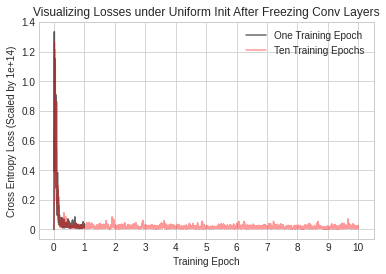

In [3]:
fig, axes = plt.subplots()
axes.plot(u_conv, color='black', alpha=0.6, label="One Training Epoch")
axes.plot(u_conv_10, color='red', alpha=0.4, label="Ten Training Epochs")
axes.set_xticks(np.linspace(0, 10*600, 11), labels=np.arange(0, 11))
axes.set_xlabel("Training Epoch")
axes.set_ylabel("Cross Entropy Loss (Scaled by 1e+14)")
axes.set_title("Visualizing Losses under Uniform Init After Freezing Conv Layers")

axes.set_yticks([0, 0.2 * 1e+14, 0.4* 1e+14, 0.6* 1e+14, 0.8* 1e+14, 1.0* 1e+14, 1.2* 1e+14, 1.4* 1e+14], labels=[0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4])
#axes.ticklabel_format(useOffset=False, style='plain', axis='y')
plt.legend()
plt.savefig('u_freeze_epoch_change.png', dpi=300)
fig.show()

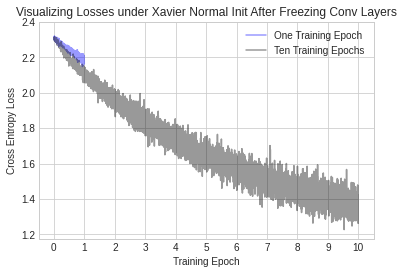

In [58]:
fig, axes = plt.subplots()
axes.plot(xn_conv[0], color='b', alpha=0.4, label="One Training Epoch")
axes.plot(xn_conv_10, color='k', alpha=0.4, label="Ten Training Epochs")
axes.set_xticks(np.linspace(0, 10*600, 11), labels=np.arange(0, 11))
axes.set_yticks([1.2, 1.4, 1.6, 1.8, 2.0, 2.2, 2.4])
axes.set_xlabel("Training Epoch")
axes.set_ylabel("Cross Entropy Loss")
axes.set_title("Visualizing Losses under Xavier Normal Init After Freezing Conv Layers")
plt.legend()
plt.savefig('xn_freeze_epoch_change.png', dpi=300)
fig.show()

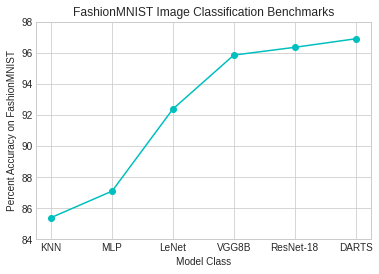

In [32]:
# generate FashionMNIST benchmarks here

labels = ['KNN', 'MLP', 'LeNet', 'VGG8B', 'ResNet-18', 'DARTS']
accuracies = [85.4, 87.1, 92.39, 95.86, 96.36, 96.91]
plt.plot(accuracies, 'co-')
plt.xticks(ticks=(0, 1, 2, 3, 4, 5), labels=labels)
plt.yticks(ticks=(84, 86, 88, 90, 92, 94, 96, 98))
plt.xlabel('Model Class')
plt.ylabel('Percent Accuracy on FashionMNIST')
plt.title('FashionMNIST Image Classification Benchmarks')
plt.savefig('experiments/fashionmnist-benchmarks.png', dpi=300)
plt.show()

In [22]:
def trailing_window_view(xs, window_size):
    assert (window_size % 2) == 1, "window size should be odd"
    view = np.lib.stride_tricks.sliding_window_view(
        np.pad(xs, (window_size - 1, 0), mode="edge"), window_size
    )
    return view

def make_loss_plot(ax, xs, losses, ws=1):
    data = trailing_window_view(losses, ws)
    μ = data.mean(-1)
    σ = data.std(-1)
    ax.plot(xs, μ)
    ax.fill_between(xs, μ - σ, μ + σ, alpha=0.3)

In [69]:
lenet_loss_z = np.load('experiments/weightinit/lenet-zeros-bn/loss.npy')
lenet_loss_o = np.load('experiments/weightinit/lenet-ones-bn/loss.npy')
lenet_loss_n = np.load('experiments/weightinit/lenet-normal-bn/loss.npy')
lenet_loss_u = np.load('experiments/weightinit/lenet-uniform-bn/loss.npy')
lenet_loss_xn = np.load('experiments/weightinit/lenet-xaviernorm-bn/loss.npy')
lenet_loss_xu = np.load('experiments/weightinit/lenet-xavieruniform-bn/loss.npy')

vgg_loss_z = np.load('experiments/weightinit/vgg-zeros-bn/loss.npy')
vgg_loss_o = np.load('experiments/weightinit/vgg-ones-bn/loss.npy')
vgg_loss_n = np.load('experiments/weightinit/vgg-normal-bn/loss.npy')
vgg_loss_u = np.load('experiments/weightinit/vgg-uniform-bn/loss.npy')
vgg_loss_xn = np.load('experiments/weightinit/vgg-xaviernorm-bn/loss.npy')
vgg_loss_xu = np.load('experiments/weightinit/vgg-xavieruniform-bn/loss.npy')

lenet_loss_z[lenet_loss_z > 3] = 3
lenet_loss_o[lenet_loss_o > 3] = 3
lenet_loss_n[lenet_loss_n > 3] = 3
lenet_loss_u[lenet_loss_u > 3] = 3
lenet_loss_xn[lenet_loss_xn > 3] = 3
lenet_loss_xu[lenet_loss_xu > 3] = 3

vgg_loss_z[vgg_loss_z > 3] = 3
vgg_loss_o[vgg_loss_o > 3] = 3
vgg_loss_n[vgg_loss_n > 3] = 3
vgg_loss_u[vgg_loss_u > 3] = 3
vgg_loss_xn[vgg_loss_xn > 3] = 3
vgg_loss_xu[vgg_loss_xu > 3] = 3

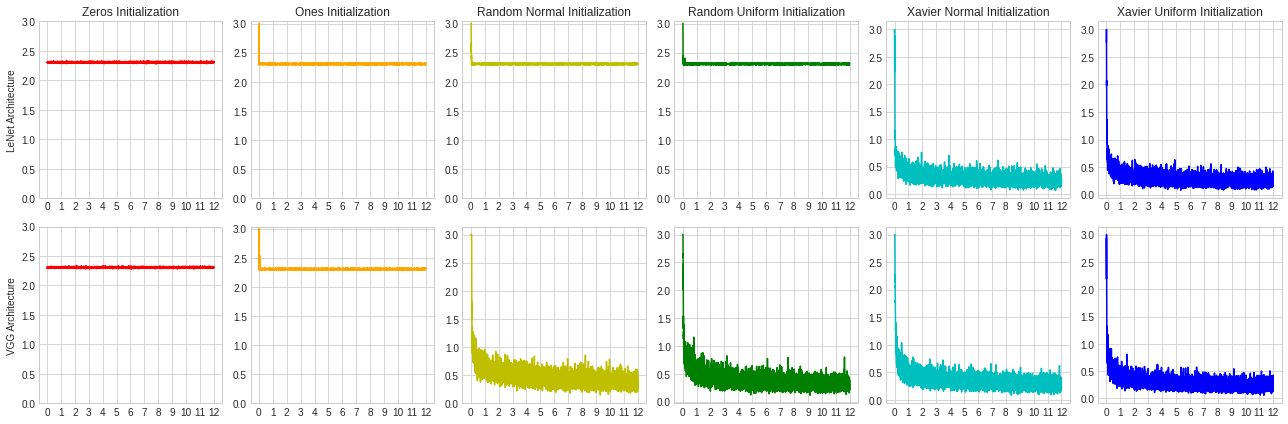

In [70]:
# generate loss plots for LeNet model on different weight initialization methods
fig, axs = plt.subplots(2, 6, figsize=(18, 6))
xs = np.arange(12 * 600)

#make_plot(axs[0,0], np.arange(0, 12*600), lenet_loss_z.reshape(-1))

axs[0,0].plot(lenet_loss_z.reshape(-1), color='r')
axs[0,0].set_title("Zeros Initialization")
axs[0,0].set_ylabel("LeNet Architecture")
axs[0,0].set_xticks(np.linspace(0, 12*600, 13), labels=np.arange(0, 13))
axs[0,0].set_yticks(np.linspace(0, 3, 7))

axs[1,0].plot(vgg_loss_z.reshape(-1), color='r')
axs[1,0].set_ylabel("VGG Architecture")
axs[1,0].set_xticks(np.linspace(0, 12*600, 13), labels=np.arange(0, 13))
axs[1,0].set_yticks(np.linspace(0, 3, 7))

axs[0,1].plot(lenet_loss_o.reshape(-1), color='orange')
axs[0,1].set_title("Ones Initialization")
axs[0,1].set_xticks(np.linspace(0, 12*600, 13), labels=np.arange(0, 13))
axs[0,1].set_yticks(np.linspace(0, 3, 7))

axs[1,1].plot(vgg_loss_o.reshape(-1), color='orange')
axs[1,1].set_xticks(np.linspace(0, 12*600, 13), labels=np.arange(0, 13))
axs[1,1].set_yticks(np.linspace(0, 3, 7))

axs[0,2].plot(lenet_loss_n.reshape(-1), color='y')
axs[0,2].set_title("Random Normal Initialization")
axs[0,2].set_xticks(np.linspace(0, 12*600, 13), labels=np.arange(0, 13))
axs[0,2].set_yticks(np.linspace(0, 3, 7))

axs[1,2].plot(vgg_loss_n.reshape(-1), color='y')
axs[1,2].set_xticks(np.linspace(0, 12*600, 13), labels=np.arange(0, 13))
axs[1,2].set_yticks(np.linspace(0, 3, 7))

axs[0,3].plot(lenet_loss_u.reshape(-1), color='g')
axs[0,3].set_title("Random Uniform Initialization")
axs[0,3].set_xticks(np.linspace(0, 12*600, 13), labels=np.arange(0, 13))
axs[0,3].set_yticks(np.linspace(0, 3, 7))

axs[1,3].plot(vgg_loss_u.reshape(-1), color='g')
axs[1,3].set_xticks(np.linspace(0, 12*600, 13), labels=np.arange(0, 13))
axs[1,3].set_yticks(np.linspace(0, 3, 7))

axs[0,4].plot(lenet_loss_xn.reshape(-1), color='c')
axs[0,4].set_title("Xavier Normal Initialization")
axs[0,4].set_xticks(np.linspace(0, 12*600, 13), labels=np.arange(0, 13))

axs[1,4].plot(vgg_loss_xn.reshape(-1), color='c')
axs[1,4].set_xticks(np.linspace(0, 12*600, 13), labels=np.arange(0, 13))

axs[0,5].plot(lenet_loss_xu.reshape(-1), color='b')
axs[0,5].set_title("Xavier Uniform Initialization")
axs[0,5].set_xticks(np.linspace(0, 12*600, 13), labels=np.arange(0, 13))


#make_plot(axs[1,5], np.arange(0, 12*600), lenet_loss_z.reshape(-1))
axs[1,5].plot(vgg_loss_xu.reshape(-1), color='b')
axs[1,5].set_xticks(np.linspace(0, 12*600, 13), labels=np.arange(0, 13))
axs[1,5].set_yticks(np.linspace(0, 3, 7))

fig.tight_layout()
plt.savefig('experiments/weightinit/combined-losses.png', dpi=300)
plt.show()

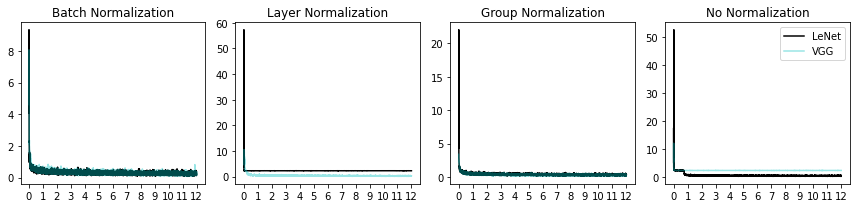

In [3]:
x = np.arange(12*600)

lenet_loss_bn = np.load('experiments/weightnorm/lenet-kaiminguniform-bn/loss.npy')
lenet_loss_ln = np.load('experiments/weightnorm/lenet-kaiminguniform-ln/loss.npy')
lenet_loss_gn = np.load('experiments/weightnorm/lenet-kaiminguniform-gn/loss.npy')
lenet_loss_nn = np.load('experiments/weightnorm/lenet-kaiminguniform-nn/loss.npy')

vgg_loss_bn = np.load('experiments/weightnorm/vgg-kaiminguniform-bn/loss.npy')
vgg_loss_ln = np.load('experiments/weightnorm/vgg-kaiminguniform-ln/loss.npy')
vgg_loss_gn = np.load('experiments/weightnorm/vgg-kaiminguniform-gn/loss.npy')
vgg_loss_nn = np.load('experiments/weightnorm/vgg-kaiminguniform-nn/loss.npy')

fig, axs = plt.subplots(1, 4, figsize=(12, 3))

axs[0].plot(lenet_loss_bn.reshape(-1), color='k', alpha=1)
axs[0].plot(vgg_loss_bn.reshape(-1), color='c', alpha=0.4)
axs[0].set_title("Batch Normalization")
axs[0].set_xticks(np.linspace(0, 12*600, 13), labels=np.arange(0, 13))

axs[1].plot(lenet_loss_ln.reshape(-1), color='k', alpha=1)
axs[1].plot(vgg_loss_ln.reshape(-1), color='c', alpha=0.4)
axs[1].set_title("Layer Normalization")
axs[1].set_xticks(np.linspace(0, 12*600, 13), labels=np.arange(0, 13))

axs[2].plot(lenet_loss_gn.reshape(-1), color='k', alpha=1)
axs[2].plot(vgg_loss_gn.reshape(-1), color='c', alpha=0.4)
axs[2].set_title("Group Normalization")
axs[2].set_xticks(np.linspace(0, 12*600, 13), labels=np.arange(0, 13))

axs[3].plot(lenet_loss_nn.reshape(-1), color='k', alpha=1)
axs[3].plot(vgg_loss_nn.reshape(-1), color='c', alpha=0.4)
axs[3].set_title("No Normalization")
axs[3].set_xticks(np.linspace(0, 12*600, 13), labels=np.arange(0, 13))

fig.tight_layout()
plt.legend(['LeNet', 'VGG'])
#plt.savefig('experiments/weightnorm/kaiminguniform-losses.png', dpi=300)
plt.show()

In [141]:
def extract_data():
    loss = np.load('experiments/weightnorm/vgg-normal-bn/loss.npy')
    params = torch.load('experiments/weightnorm/vgg-normal-bn/param.pt')
    gradients = torch.load('experiments/weightnorm/vgg-normal-bn/grad.pt')
    return loss, params, gradients

In [25]:
params = torch.load('experiments/weightnorm/vgg-kaiminguniform-bn/param.pt')
params.keys()

dict_keys(['0.weight', '0.bias', '1.weight', '1.bias', '4.weight', '4.bias', '5.weight', '5.bias', '8.weight', '8.bias', '9.weight', '9.bias', '13.weight', '13.bias'])

In [30]:
def export_2d_data(model, norm, numeric_vals):
    data = f'experiments/weightnorm/{model}-kaiminguniform-{norm}/{numeric_vals}.pt'
    export_location = f'experiments/weightnorm/{model}-kaiminguniform-{norm}/{numeric_vals}-2d.npy'
    all_plots = []
    for i in range(12): # epochs
        for j in range(12): # data saved per epoch
            fig, ax = plt.subplots(figsize=(5, 5))

            data = params['0.weight'][i][j]
            x_d = np.linspace(-0.93, 0.93, 100)
            y_d, _ = np.histogram(a=data, bins=100, range=(-0.93, 0.93), density=True)
            ax.plot(x_d, y_d)
            ax.set_yticks(np.arange(0, 2, 16))
            ax.set_title(f"Epoch {i+1}")

            fig.canvas.draw()
            plot = np.array(fig.canvas.renderer.buffer_rgba())
            plt.close(fig)
            all_plots.append(plot)

    all_plots = np.stack(all_plots, axis=0)
    np.save(export_location, all_plots)

In [31]:
export_2d_data('vgg', 'bn', 'params')

In [32]:
def stitch_movie():
    import imageio
    plots = np.load('experiments/weightnorm/vgg-kaiminguniform-bn/params-2d.npy')
    
    #N, H, W, D = seqs[0].shape
    #seqs = np.stack(seqs, axis=2).reshape(N, H, 3 * W, D)
    
    writer = imageio.get_writer('experiments/weightnorm/testing.mp4', fps=12)
    for img in plots:
        writer.append_data(img)
    writer.close()

stitch_movie()

IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (360, 360) to (368, 368) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).


Mean: 0.00033258658
Standard deviation: 0.010424276


Mean: 4.7709258e-05
Standard deviation: 0.010741728


Mean: 0.0013950972
Standard deviation: 0.009811066


Mean: 0.0008588544
Standard deviation: 0.011162235


Mean: -0.00056323287
Standard deviation: 0.011739921


Mean: -0.0010567132
Standard deviation: 0.0127222445


Mean: -0.0016790554
Standard deviation: 0.014021297


Mean: 0.00087425386
Standard deviation: 0.013992613


Mean: -0.002399986
Standard deviation: 0.018232098


Mean: -0.002964912
Standard deviation: 0.019981464


Mean: 0.0011157556
Standard deviation: 0.030848878


Mean: -0.03817897
Standard deviation: 0.20985419




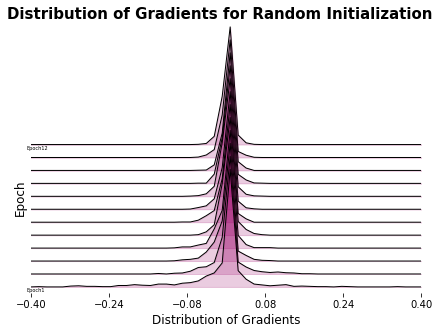

In [145]:
# ridge plots modeled after https://matplotlib.org/matplotblog/posts/create-ridgeplots-in-matplotlib/
def viz_gradients():
    
    color = '#990066'; outline = '#000000'
    
    weights = params['0.weight']

    gs = grid_spec.GridSpec(weights.shape[0], ncols=1) # epochs by 1
    fig = plt.figure(figsize=(7,5))

    ax_objs = []
    spines = ["top", "right", "left", "bottom"]
    x_low = -0.4; x_high = 0.4

    for epoch in reversed(range(weights.shape[0])):
        # breakpoint()
        data = weights[epoch].reshape(-1, 1).squeeze() # line up all data points in one line
        print("Mean: " + str(np.mean(data)))
        print("Standard deviation: " + str(np.std(data)))
        print("\n")
        #density = kde.gaussian_kde(data)
        x_d = np.linspace(x_low, x_high, 50)
        y_d, _ = np.histogram(a=data, bins=50, range=(x_low, x_high), density=True)
        #y_d = density(x_d)


        ax_objs.append(fig.add_subplot(gs[weights.shape[0]-1-epoch:weights.shape[0]-epoch, 0:]))
        ax_objs[-1].plot(x_d, y_d, color=outline, lw=1)
        ax_objs[-1].fill_between(x_d, y_d, alpha=0.2, color=color)

        ax_objs[-1].set_xlim(x_low, x_high)

        rect = ax_objs[-1].patch
        rect.set_alpha(0)

        ax_objs[-1].set_yticks([])
        if epoch == 0:
            ax_objs[-1].set_xlabel("Distribution of Gradients", fontsize=12)
            ax_objs[-1].set_xticks(np.arange(x_low, x_high + 1e-5, (x_high - x_low) / 5))
        else:
            ax_objs[-1].set_xticks([])

        if epoch == 0 or epoch == weights.shape[0] - 1:
            ax_objs[-1].set_ylabel("Epoch" + str(epoch + 1), fontsize=5, loc='bottom', rotation='horizontal')

        if epoch == np.ceil(weights.shape[0] / 2):
            ax_objs[-1].set_ylabel("Epoch", fontsize=12, loc='bottom')

        for s in spines:
            ax_objs[-1].spines[s].set_visible(False)

    gs.update(hspace=-0.9)
    fig.suptitle("Distribution of Gradients for Random Initialization", fontweight='bold', fontsize=15, y=0.92)
    # plt.title("Distribution of Gradients for Zeros Initialization", fontweight='bold', fontsize=15)
    # plt.savefig("random_init_gradients.pdf")
    # plt.tight_layout()
    plt.show()

viz_gradients()

In [58]:
gradients['4.weight'].shape

(12, 12, 864)

In [20]:
gradients['4.weight'][6].max()

0.5432024

In [34]:
lenet_params_bn = torch.load('experiments/weightnorm/lenet-xaviernorm-bn/param.pt')
lenet_params_ln = torch.load('experiments/weightnorm/lenet-xaviernorm-ln/param.pt')
lenet_params_gn = torch.load('experiments/weightnorm/lenet-xaviernorm-gn/param.pt')

lenet_grads_bn = torch.load('experiments/weightnorm/lenet-xaviernorm-bn/grad.pt')
lenet_grads_ln = torch.load('experiments/weightnorm/lenet-xaviernorm-ln/grad.pt')
lenet_grads_gn = torch.load('experiments/weightnorm/lenet-xaviernorm-gn/grad.pt')

In [25]:
lenet_params_bn.keys()

dict_keys(['0.weight', '0.bias', '1.weight', '1.bias', '4.weight', '4.bias', '5.weight', '5.bias', '9.weight', '9.bias', '11.weight', '11.bias'])

In [33]:
lenet_params_bn['5.weight']

array([[[ 1.97146475e-01,  0.00000000e+00, -2.19254583e-01, ...,
         -1.46547765e-01,  1.11947678e-01, -3.59120257e-02],
        [ 1.60019118e-02,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00, -2.81377621e-02, -8.05734992e-02],
        [-9.54584405e-03,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  4.24438715e-02, -1.80940726e-03],
        ...,
        [ 1.44760087e-01,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00, -3.82972844e-02, -5.31317620e-03],
        [-8.38832259e-02,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  6.22151345e-02,  0.00000000e+00],
        [-1.20281717e-02,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00, -9.56290588e-02, -9.39321704e-03]],

       [[ 8.39507282e-02,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00, -9.29520130e-02,  3.93403089e-03],
        [ 1.39156133e-01,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00, -9.33913514e

In [34]:
lenet_params_ln['5.weight']

array([[[0.        , 0.        , 0.00938599, ..., 0.        ,
         0.        , 0.00235528],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ]],

       [[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0. 

In [35]:
lenet_params_gn['5.weight']

array([[[ 0.0983528 ,  0.        ,  0.00946259, ...,  0.15118712,
          0.        , -0.0825862 ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        ...,
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ]],

       [[ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        ...,
        [ 0.        ,  0.        ,  0.        , ...,  

In [73]:
def export_2d_data(model, norm, numeric_vals):
    #data = f'experiments/weightnorm/{model}-xaviernorm-{norm}/{numeric_vals}.pt'
    #data = torch.load(data)
    #print(data.keys())
    export_location = f'experiments/weightnorm/{model}-xaviernorm-{norm}/{numeric_vals}-2d.npy'
    all_plots = []
    
    data = lenet_params_ln['5.weight']
    for i in range(12): # epochs
        for j in range(12): # data saved per epoch
            fig, ax = plt.subplots(figsize=(5, 5))
            
            

            a = lenet_params_ln['5.weight'][i][j]
            x_d = np.linspace(-.01, .01, 100)
            y_d, _ = np.histogram(a=a, bins=100, range=(-.01, .01), density=True)
            ax.plot(x_d, y_d)
            #ax.set_yticks(np.arange(0, 2, 16))
            ax.set_title(f"Epoch {i+1}")

            fig.canvas.draw()
            plot = np.array(fig.canvas.renderer.buffer_rgba())
            plt.close(fig)
            all_plots.append(plot)

    all_plots = np.stack(all_plots, axis=0)
    np.save(export_location, all_plots)

In [49]:
lenet_params_bn['1.weight'][0][0]

array([ 0.13948783,  0.10444867,  0.        , -0.0099939 ,  0.06352999,
        0.04495472], dtype=float32)

In [74]:
export_2d_data('lenet', 'bn', 'param')
#export_2d_data('lenet', 'ln', 'param')
#export_2d_data('lenet', 'gn', 'param')

In [75]:
def stitch_movie():
    import imageio
    plots = np.load('experiments/weightnorm/lenet-xaviernorm-bn/param-2d.npy')
    
    #N, H, W, D = seqs[0].shape
    #seqs = np.stack(seqs, axis=2).reshape(N, H, 3 * W, D)
    
    writer = imageio.get_writer('experiments/weightnorm/lenet-xaviernorm-bn-param-2d.mp4', fps=12)
    for img in plots:
        writer.append_data(img)
    writer.close()

stitch_movie()

IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (360, 360) to (368, 368) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).


In [81]:
x = lenet_params_bn['5.weight']
y = lenet_params_ln['5.weight']
z = lenet_params_gn['5.weight']

a = lenet_grads_bn['5.weight']
b = lenet_grads_ln['5.weight']
c = lenet_grads_gn['5.weight']

In [78]:
x.mean(axis=-1)

(12, 12)

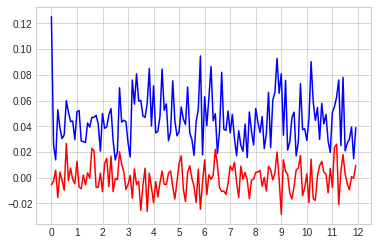

In [80]:
plt.plot(x.mean(axis=-1).reshape(-1), color='r')
plt.plot(x.std(axis=-1).reshape(-1), color='b')
plt.xticks(np.linspace(0, 12*12, 13), labels=np.arange(0, 13))
plt.show()

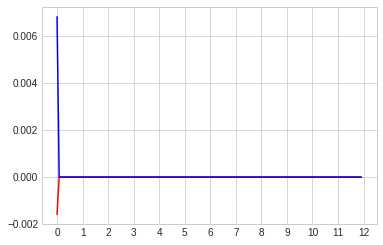

In [86]:
plt.plot(y.mean(axis=-1).reshape(-1), color='r')
plt.plot(y.std(axis=-1).reshape(-1), color='b')
plt.xticks(np.linspace(0, 12*12, 13), labels=np.arange(0, 13))
plt.show()

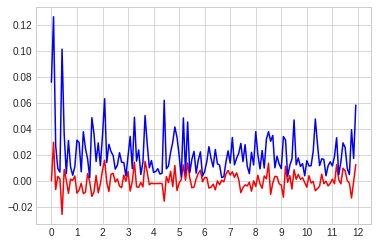

In [83]:
plt.plot(z.mean(axis=-1).reshape(-1), color='r')
plt.plot(z.std(axis=-1).reshape(-1), color='b')
plt.xticks(np.linspace(0, 12*12, 13), labels=np.arange(0, 13))
plt.show()

In [88]:
a = lenet_grads_bn['5.weight']
b = lenet_grads_ln['5.weight']
c = lenet_grads_gn['5.weight']

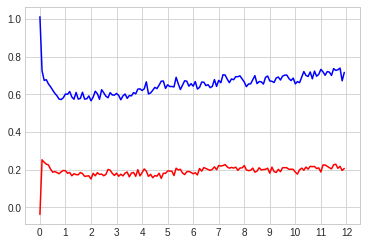

In [89]:
plt.plot(a.mean(axis=-1).reshape(-1), color='r')
plt.plot(a.std(axis=-1).reshape(-1), color='b')
plt.xticks(np.linspace(0, 12*12, 13), labels=np.arange(0, 13))
plt.show()

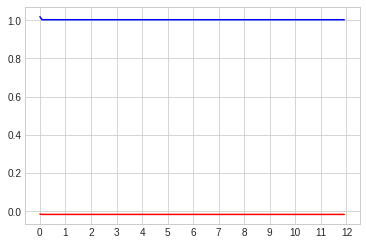

In [90]:
plt.plot(b.mean(axis=-1).reshape(-1), color='r')
plt.plot(b.std(axis=-1).reshape(-1), color='b')
plt.xticks(np.linspace(0, 12*12, 13), labels=np.arange(0, 13))
plt.show()

dict_keys(['0.weight', '0.bias', '1.weight', '1.bias', '4.weight', '4.bias', '5.weight', '5.bias', '9.weight', '9.bias', '11.weight', '11.bias'])

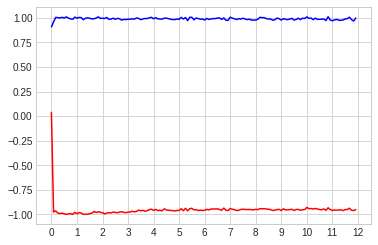

In [106]:
plt.plot(c.mean(axis=-1).reshape(-1), color='r')
plt.plot(c.std(axis=-1).reshape(-1), color='b')
plt.xticks(np.linspace(0, 12*12, 13), labels=np.arange(0, 13))
#plt.show()

lenet_params_bn.keys()

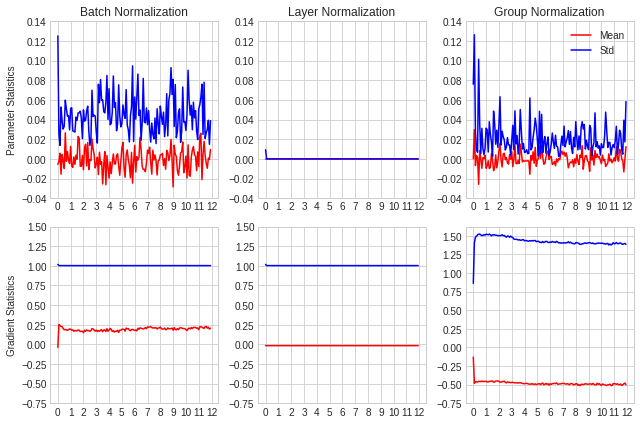

In [54]:
x = lenet_params_bn['5.weight']
y = lenet_params_ln['5.weight']
z = lenet_params_gn['5.weight']

a = lenet_grads_bn['5.weight']
b = lenet_grads_ln['5.weight']
c = lenet_grads_gn['5.weight']

fig, axs = plt.subplots(2, 3, figsize=(9, 6))

axs[0,0].plot(x.mean(axis=-1).reshape(-1), color='r')
axs[0,0].plot(x.std(axis=-1).reshape(-1), color='b')
axs[0,0].set_xticks(np.linspace(0, 12*12, 13), labels=np.arange(0, 13))
axs[0,0].set_yticks([-0.04, -0.02, 0.00, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14])
axs[0,0].set_ylabel('Parameter Statistics')
axs[0,0].set_title('Batch Normalization')

axs[1,0].plot(a.mean(axis=-1).reshape(-1), color='r')
axs[1,0].plot(b.std(axis=-1).reshape(-1), color='b')
axs[1,0].set_xticks(np.linspace(0, 12*12, 13), labels=np.arange(0, 13))
axs[1,0].set_yticks([-0.75, -0.50, -0.25, 0.00, 0.25, 0.50, 0.75, 1.00, 1.25, 1.50])
axs[1,0].set_ylabel('Gradient Statistics')

axs[0,1].plot(y.mean(axis=-1).reshape(-1), color='r')
axs[0,1].plot(y.std(axis=-1).reshape(-1), color='b')
axs[0,1].set_xticks(np.linspace(0, 12*12, 13), labels=np.arange(0, 13))
axs[0,1].set_yticks([-0.04, -0.02, 0.00, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14])
axs[0,1].set_title('Layer Normalization')

axs[1,1].plot(b.mean(axis=-1).reshape(-1), color='r')
axs[1,1].plot(b.std(axis=-1).reshape(-1), color='b')
axs[1,1].set_xticks(np.linspace(0, 12*12, 13), labels=np.arange(0, 13))
axs[1,1].set_yticks([-0.75, -0.50, -0.25, 0.00, 0.25, 0.50, 0.75, 1.00, 1.25, 1.50])

axs[0,2].plot(z.mean(axis=-1).reshape(-1), color='r')
axs[0,2].plot(z.std(axis=-1).reshape(-1), color='b')
axs[0,2].set_xticks(np.linspace(0, 12*12, 13), labels=np.arange(0, 13))
axs[0,2].set_yticks([-0.04, -0.02, 0.00, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14])
axs[0,2].set_title('Group Normalization')
axs[0,2].legend(('Mean', 'Std'))

axs[1,2].plot(c.mean(axis=-1).reshape(-1), color='r')
axs[1,2].plot(c.std(axis=-1).reshape(-1), color='b')
axs[1,2].set_xticks(np.linspace(0, 12*12, 13), labels=np.arange(0, 13))
axs[1,2].set_yticks([-0.75, -0.50, -0.25, 0.00, 0.25, 0.50, 0.75, 1.00, 1.25, 1.50])

fig.tight_layout()
plt.savefig('experiments/lenet-second-layer-gamma-viz.png', dpi=300)
plt.show()

In [3]:
vgg_xaviernorm_ln_gradients = torch.load('experiments/weightnorm/vgg-xaviernorm-ln/grad.pt')
vgg_xaviernorm_ln_params = torch.load('experiments/weightnorm/vgg-xaviernorm-ln/param.pt')

lenet_xaviernorm_ln_gradients = torch.load('experiments/weightnorm/lenet-xaviernorm-ln/grad.pt')
lenet_xaviernorm_ln_params = torch.load('experiments/weightnorm/lenet-xaviernorm-ln/param.pt')

In [141]:
weights = lenet_xaviernorm_ln_params['1.weight']
weights[0][0].reshape(-1, 1).shape

(4704, 1)

In [66]:
def viz_gradients(data):
    
    color = '#990066'; outline = '#000000'
    
    weights = data['5.weight']

    gs = grid_spec.GridSpec(weights.shape[0], ncols=1) # epochs by 1
    fig = plt.figure(figsize=(7,5))

    ax_objs = []
    spines = ["top", "right", "left", "bottom"]
    x_low = -4; x_high = 4

    for epoch in reversed(range(weights.shape[0])):
        # breakpoint()
        data = weights[epoch].reshape(-1, 1).squeeze() # line up all data points in one line
        print("Mean: " + str(np.mean(data)))
        print("Standard deviation: " + str(np.std(data)))
        print("\n")
        #density = kde.gaussian_kde(data)
        x_d = np.linspace(x_low, x_high, 50)
        y_d, _ = np.histogram(a=data, bins=50, range=(x_low, x_high), density=True)
        #y_d = density(x_d)


        ax_objs.append(fig.add_subplot(gs[weights.shape[0]-1-epoch:weights.shape[0]-epoch, 0:]))
        ax_objs[-1].plot(x_d, y_d, color=outline, lw=1)
        ax_objs[-1].fill_between(x_d, y_d, alpha=0.2, color=color)

        ax_objs[-1].set_xlim(x_low, x_high)

        rect = ax_objs[-1].patch
        rect.set_alpha(0)

        ax_objs[-1].set_yticks([])
        if epoch == 0:
            ax_objs[-1].set_xlabel("Distribution of Gradients", fontsize=12)
            ax_objs[-1].set_xticks(np.arange(x_low, x_high + 1e-5, (x_high - x_low) / 5))
        else:
            ax_objs[-1].set_xticks([])

        #if epoch == 0 or epoch == weights.shape[0] - 1:
        #    ax_objs[-1].set_ylabel("Epoch" + str(epoch + 1), fontsize=5, loc='bottom', rotation='horizontal')

        if epoch == np.ceil(weights.shape[0] / 2 - 1):
            ax_objs[-1].set_ylabel("Epoch", fontsize=12, loc='bottom')

        for s in spines:
            ax_objs[-1].spines[s].set_visible(False)

    gs.update(hspace=-0.9)
    fig.suptitle("Distribution of Affine Gradients in VGG, First Layer", fontweight='bold', fontsize=15, y=0.92)
    #plt.savefig("experiments/vgg-xaviernorm-gradient-dist.png", dpi=300)
    # plt.tight_layout()
    plt.show()

Mean: 0.0
Standard deviation: 0.0


Mean: 0.0
Standard deviation: 0.0


Mean: 0.0
Standard deviation: 0.0


Mean: 0.0
Standard deviation: 0.0


Mean: 0.0
Standard deviation: 0.0


Mean: 0.0
Standard deviation: 0.0


Mean: 0.0
Standard deviation: 0.0


Mean: 0.0
Standard deviation: 0.0


Mean: 0.0
Standard deviation: 0.0


Mean: 0.0
Standard deviation: 0.0


Mean: 0.0
Standard deviation: 0.0


Mean: 2.7153368e-05
Standard deviation: 0.002498593




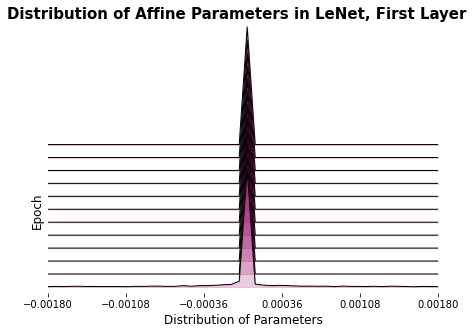

In [7]:
viz_gradients(lenet_xaviernorm_ln_params)

Mean: 6.0070456e-06
Standard deviation: 0.0008958138


Mean: -2.2629147e-05
Standard deviation: 0.0008778897


Mean: 1.2720042e-05
Standard deviation: 0.0010452971


Mean: 2.7412083e-05
Standard deviation: 0.0009012536


Mean: -9.7504635e-06
Standard deviation: 0.00089000346


Mean: 2.156381e-05
Standard deviation: 0.0011078846


Mean: -8.716831e-06
Standard deviation: 0.00088356494


Mean: -8.791469e-06
Standard deviation: 0.0010396842


Mean: 2.0298054e-05
Standard deviation: 0.0011217232


Mean: 3.0985666e-05
Standard deviation: 0.0014694091


Mean: -5.6022504e-06
Standard deviation: 0.0009029242


Mean: 1.5921185e-05
Standard deviation: 0.0021313343




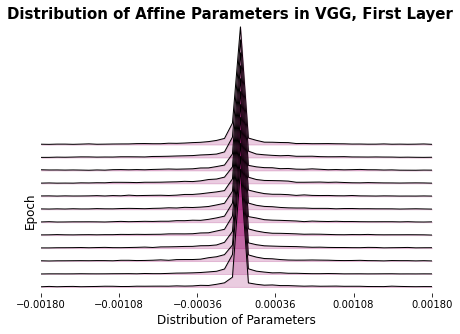

In [9]:
viz_gradients(vgg_xaviernorm_ln_params)

Mean: -0.023888059
Standard deviation: 1.0139779


Mean: -0.023888059
Standard deviation: 1.0139779


Mean: -0.023888059
Standard deviation: 1.0139779


Mean: -0.023888059
Standard deviation: 1.0139779


Mean: -0.023888059
Standard deviation: 1.0139779


Mean: -0.023888059
Standard deviation: 1.0139779


Mean: -0.023888059
Standard deviation: 1.0139779


Mean: -0.023888059
Standard deviation: 1.0139779


Mean: -0.023888059
Standard deviation: 1.0139779


Mean: -0.023888059
Standard deviation: 1.0139779


Mean: -0.023888059
Standard deviation: 1.0139779


Mean: -0.023872605
Standard deviation: 1.0139073




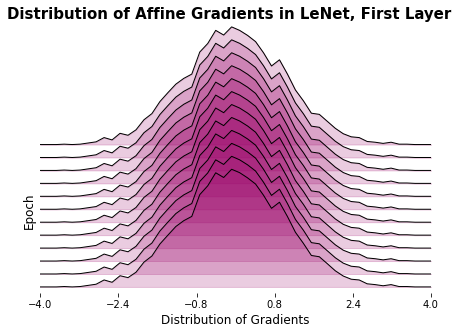

In [11]:
viz_gradients(lenet_xaviernorm_ln_gradients)

Mean: 0.0064842664
Standard deviation: 1.0211304


Mean: 0.0065250173
Standard deviation: 1.0197189


Mean: 0.006865393
Standard deviation: 1.0183223


Mean: 0.006940576
Standard deviation: 1.0168418


Mean: 0.007101278
Standard deviation: 1.015367


Mean: 0.0075067678
Standard deviation: 1.013607


Mean: 0.0075317645
Standard deviation: 1.0118536


Mean: 0.007858318
Standard deviation: 1.0100783


Mean: 0.00830654
Standard deviation: 1.0081179


Mean: 0.008680754
Standard deviation: 1.0063332


Mean: 0.008821593
Standard deviation: 1.0044823


Mean: 0.008491627
Standard deviation: 1.0001147




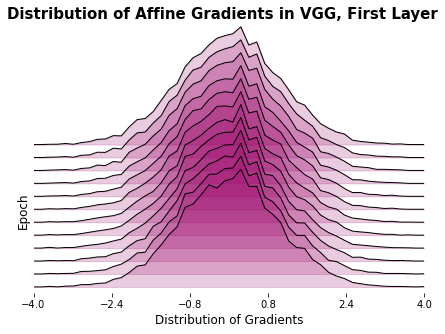

In [14]:
viz_gradients(vgg_xaviernorm_ln_gradients)

In [55]:
lenet_params_bn = torch.load('experiments/weightnorm/lenet-xaviernorm-bn/param.pt')
lenet_params_ln = torch.load('experiments/weightnorm/lenet-xaviernorm-ln/param.pt')
lenet_params_gn = torch.load('experiments/weightnorm/lenet-xaviernorm-gn/param.pt')

lenet_grads_bn = torch.load('experiments/weightnorm/lenet-xaviernorm-bn/grad.pt')
lenet_grads_ln = torch.load('experiments/weightnorm/lenet-xaviernorm-ln/grad.pt')
lenet_grads_gn = torch.load('experiments/weightnorm/lenet-xaviernorm-gn/grad.pt')

Mean: -0.49390897
Standard deviation: 1.3954436


Mean: -0.5010532
Standard deviation: 1.3921319


Mean: -0.4927781
Standard deviation: 1.4003842


Mean: -0.4955368
Standard deviation: 1.3982935


Mean: -0.4906056
Standard deviation: 1.4043691


Mean: -0.48682973
Standard deviation: 1.4128652


Mean: -0.49127388
Standard deviation: 1.4172839


Mean: -0.48991147
Standard deviation: 1.4321775


Mean: -0.475502
Standard deviation: 1.4534557


Mean: -0.46426073
Standard deviation: 1.4974102


Mean: -0.45627022
Standard deviation: 1.5122751


Mean: -0.432314
Standard deviation: 1.4592266




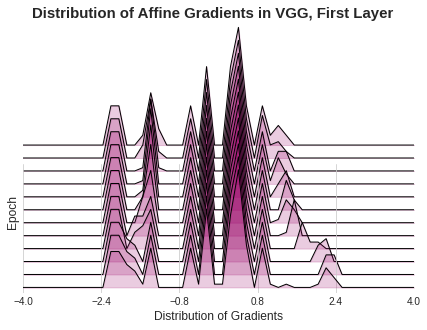

In [67]:
viz_gradients(lenet_grads_gn)

In [16]:
lenet_grads_nn.keys()

dict_keys(['0.weight', '0.bias', '3.weight', '3.bias', '7.weight', '7.bias', '9.weight', '9.bias'])

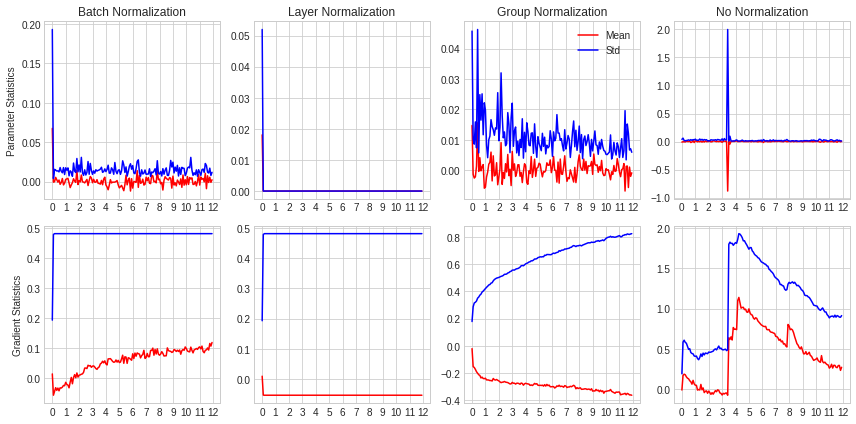

In [8]:
lenet_params_bn = torch.load('experiments/weightnorm/lenet-xaviernorm-bn/param.pt')
lenet_params_ln = torch.load('experiments/weightnorm/lenet-xaviernorm-ln/param.pt')
lenet_params_gn = torch.load('experiments/weightnorm/lenet-xaviernorm-gn/param.pt')
lenet_params_nn = torch.load('experiments/weightnorm/lenet-xaviernorm-nn/param.pt')

lenet_grads_bn = torch.load('experiments/weightnorm/lenet-xaviernorm-bn/grad.pt')
lenet_grads_ln = torch.load('experiments/weightnorm/lenet-xaviernorm-ln/grad.pt')
lenet_grads_gn = torch.load('experiments/weightnorm/lenet-xaviernorm-gn/grad.pt')
lenet_grads_nn = torch.load('experiments/weightnorm/lenet-xaviernorm-nn/grad.pt')

x = lenet_params_bn['0.weight']
y = lenet_params_ln['0.weight']
z = lenet_params_gn['0.weight']
w = lenet_params_nn['0.weight']

a = lenet_grads_bn['0.weight']
b = lenet_grads_ln['0.weight']
c = lenet_grads_gn['0.weight']
d = lenet_grads_nn['0.weight']

fig, axs = plt.subplots(2, 4, figsize=(12, 6))

axs[0,0].plot(x.mean(axis=-1).reshape(-1), color='r')
axs[0,0].plot(x.std(axis=-1).reshape(-1), color='b')
axs[0,0].set_xticks(np.linspace(0, 12*12, 13), labels=np.arange(0, 13))
#axs[0,0].set_yticks([-0.04, -0.02, 0.00, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14])
axs[0,0].set_ylabel('Parameter Statistics')
axs[0,0].set_title('Batch Normalization')

axs[1,0].plot(a.mean(axis=-1).reshape(-1), color='r')
axs[1,0].plot(b.std(axis=-1).reshape(-1), color='b')
axs[1,0].set_xticks(np.linspace(0, 12*12, 13), labels=np.arange(0, 13))
#axs[1,0].set_yticks([-0.75, -0.50, -0.25, 0.00, 0.25, 0.50, 0.75, 1.00, 1.25, 1.50])
axs[1,0].set_ylabel('Gradient Statistics')

axs[0,1].plot(y.mean(axis=-1).reshape(-1), color='r')
axs[0,1].plot(y.std(axis=-1).reshape(-1), color='b')
axs[0,1].set_xticks(np.linspace(0, 12*12, 13), labels=np.arange(0, 13))
#axs[0,1].set_yticks([-0.04, -0.02, 0.00, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14])
axs[0,1].set_title('Layer Normalization')

axs[1,1].plot(b.mean(axis=-1).reshape(-1), color='r')
axs[1,1].plot(b.std(axis=-1).reshape(-1), color='b')
axs[1,1].set_xticks(np.linspace(0, 12*12, 13), labels=np.arange(0, 13))
#axs[1,1].set_yticks([-0.75, -0.50, -0.25, 0.00, 0.25, 0.50, 0.75, 1.00, 1.25, 1.50])

axs[0,2].plot(z.mean(axis=-1).reshape(-1), color='r')
axs[0,2].plot(z.std(axis=-1).reshape(-1), color='b')
axs[0,2].set_xticks(np.linspace(0, 12*12, 13), labels=np.arange(0, 13))
#axs[0,2].set_yticks([-0.04, -0.02, 0.00, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14])
axs[0,2].set_title('Group Normalization')
axs[0,2].legend(('Mean', 'Std'))

axs[1,2].plot(c.mean(axis=-1).reshape(-1), color='r')
axs[1,2].plot(c.std(axis=-1).reshape(-1), color='b')
axs[1,2].set_xticks(np.linspace(0, 12*12, 13), labels=np.arange(0, 13))
#axs[1,2].set_yticks([-0.75, -0.50, -0.25, 0.00, 0.25, 0.50, 0.75, 1.00, 1.25, 1.50])

axs[0,3].plot(w.mean(axis=-1).reshape(-1), color='r')
axs[0,3].plot(w.std(axis=-1).reshape(-1), color='b')
axs[0,3].set_xticks(np.linspace(0, 12*12, 13), labels=np.arange(0, 13))
#axs[0,2].set_yticks([-0.04, -0.02, 0.00, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14])
axs[0,3].set_title('No Normalization')

axs[1,3].plot(d.mean(axis=-1).reshape(-1), color='r')
axs[1,3].plot(d.std(axis=-1).reshape(-1), color='b')
axs[1,3].set_xticks(np.linspace(0, 12*12, 13), labels=np.arange(0, 13))

fig.tight_layout()
plt.savefig('experiments/lenet-convone-layer-weight-viz.png', dpi=300)
plt.show()

In [9]:
cd experiments

/share/data/pals/jjahn/neural-networks/results/experiments


In [11]:
cd weightnorm

/share/data/pals/jjahn/neural-networks/results/experiments/weightnorm


In [12]:
ls

lenet-kaiminguniform-bn/          vgg-kaiminguniform-bn/
lenet-kaiminguniform-gn/          vgg-kaiminguniform-gn/
lenet-kaiminguniform-ln/          vgg-kaiminguniform-ln/
lenet-kaiminguniform-nn/          vgg-kaiminguniform-nn/
lenet-normal-bn/                  vgg-normal-bn/
lenet-normal-gn/                  vgg-normal-gn/
lenet-normal-ln/                  vgg-normal-ln/
lenet-normal-nn/                  vgg-normal-nn/
lenet-ones-nn/                    vgg-ones-nn/
lenet-uniform-bn/                 vgg-uniform-bn/
lenet-uniform-gn/                 vgg-uniform-gn/
lenet-uniform-ln/                 vgg-uniform-ln/
lenet-uniform-nn/                 vgg-uniform-nn/
lenet-xaviernorm-bn/              vgg-xaviernorm-bn/
lenet-xaviernorm-bn-param-2d.mp4  vgg-xaviernorm-gn/
lenet-xaviernorm-gn/              vgg-xaviernorm-ln/
lenet-xaviernorm-ln/              vgg-xaviernorm-nn/
lenet-xaviernorm-nn/              vgg-xavieruniform-bn/
lenet-xavieruniform-bn/           vgg-xavieruniform-gn/
lenet

In [14]:
cd ../..

/share/data/pals/jjahn/neural-networks/results
